
# PORT-CITY SIMULATION DATA - EXPERIMENTS GAUSSIAN


## Import Dependencies & Pickle Files





In [2]:
import pickle
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import importlib.util
import seaborn as sns

In [3]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!pip install -e /content/drive/MyDrive/TESE/src/quanttree/

Obtaining file:///content/drive/MyDrive/TESE/src/quanttree
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for quanttree (pyproject.toml) ... done
  Created wheel for quanttree: filename=quanttree-0.0.4-0.editable-py3-none-any.whl size=108191 sha256=a25c3f301f200c248c8c19d2f719a415813db86730ac8b8551feb208f792d75e
  Stored in directory: /tmp/pip-ephem-wheel-cache-9kgas9l4/wheels/99/ec/85/1673340f6631e76e5fa250045531248d77a9fed5a40b47df7c
Successfully built quanttree


In [5]:
import sys
sys.path.append('/content/drive/MyDrive/TESE/src/quanttree/')

In [6]:
from quanttree import QT_EWMA, QuantTree
from quanttree.baselines import OnlineQuantTree, OnlineSPLL
from quanttree import utils

In [7]:
# Path to your script
module_path = '/content/drive/MyDrive/TESE/src/febagni_scripts.py'

# Load the module
spec = importlib.util.spec_from_file_location("febagni_scripts", module_path)
febagni_scripts = importlib.util.module_from_spec(spec)
spec.loader.exec_module(febagni_scripts)
# Now you can use functions from the script
# Example: if your script has a function named 'my_function'
# febagni_scripts.my_function()


In [8]:
def import_pickle(path):
  if os.path.exists(path):
    with open(path, 'rb') as f:
      print("Pickle file imported from: ", path)
      return pickle.load(f)
  else:
    print("File not found.")

In [9]:
def plot_distribution(scenario_0, scenario_1):
  num_variables = len(febagni_scripts.variable_names)

  fig, axes = plt.subplots(num_variables, 1, figsize=(20, 5 * num_variables)) # Changed to num_variables x 1 subplot grid

  for v in range(num_variables):
      # Ensure data is 1D
      data_s0_temp = scenario_0[v, :]
      data_s1_temp = scenario_1[v, :]

      sns.kdeplot(data=data_s0_temp, ax=axes[v], label='Scenario 0', color='blue') # Indexing with v
      sns.kdeplot(data=data_s1_temp, ax=axes[v], label='Scenario 1', color='red') # Indexing with v

      axes[v].set_title(f"{febagni_scripts.variable_names[v]}") # Indexing with v
      axes[v].legend()

  plt.tight_layout()
  plt.show()

In [10]:
def plot_distribution_francia(scenario_0, scenario_1):
  num_variables = 3

  fig, axes = plt.subplots(num_variables, 1, figsize=(20, 5 * num_variables)) # Changed to num_variables x 1 subplot grid

  for v in range(num_variables):
      # Ensure data is 1D
      data_s0_temp = scenario_0[v, :]
      data_s1_temp = scenario_1[v, :]

      sns.kdeplot(data=data_s0_temp, ax=axes[v], label='Scenario 0', color='blue') # Indexing with v
      sns.kdeplot(data=data_s1_temp, ax=axes[v], label='Scenario 1', color='red') # Indexing with v

      axes[v].set_title(f"{febagni_scripts.variable_names_francia[v]}") # Indexing with v
      axes[v].legend()

  plt.tight_layout()
  plt.show()

In [11]:
path_directory = '/content/drive/MyDrive/TESE/data/preprocessed/sequential/'

for i in range(1, 13):
  path_s0 = path_directory + "data_scenario0_new/data_s0_" + str(i) + ".pkl"
  path_s1 = path_directory + "data_scenario1_new/data_s1_" + str(i) + ".pkl"


  if i == 1:
    scenario_0 = import_pickle(path_s0)
    scenario_1 = import_pickle(path_s1)
  else:
    scenario_0 = np.concatenate((scenario_0, import_pickle(path_s0)), axis=1)
    scenario_1 = np.concatenate((scenario_1, import_pickle(path_s1)), axis=1)

Pickle file imported from:  /content/drive/MyDrive/TESE/data/preprocessed/sequential/data_scenario0_new/data_s0_1.pkl
Pickle file imported from:  /content/drive/MyDrive/TESE/data/preprocessed/sequential/data_scenario1_new/data_s1_1.pkl
Pickle file imported from:  /content/drive/MyDrive/TESE/data/preprocessed/sequential/data_scenario0_new/data_s0_2.pkl
Pickle file imported from:  /content/drive/MyDrive/TESE/data/preprocessed/sequential/data_scenario1_new/data_s1_2.pkl
Pickle file imported from:  /content/drive/MyDrive/TESE/data/preprocessed/sequential/data_scenario0_new/data_s0_3.pkl
Pickle file imported from:  /content/drive/MyDrive/TESE/data/preprocessed/sequential/data_scenario1_new/data_s1_3.pkl
Pickle file imported from:  /content/drive/MyDrive/TESE/data/preprocessed/sequential/data_scenario0_new/data_s0_4.pkl
Pickle file imported from:  /content/drive/MyDrive/TESE/data/preprocessed/sequential/data_scenario1_new/data_s1_4.pkl
Pickle file imported from:  /content/drive/MyDrive/TESE/

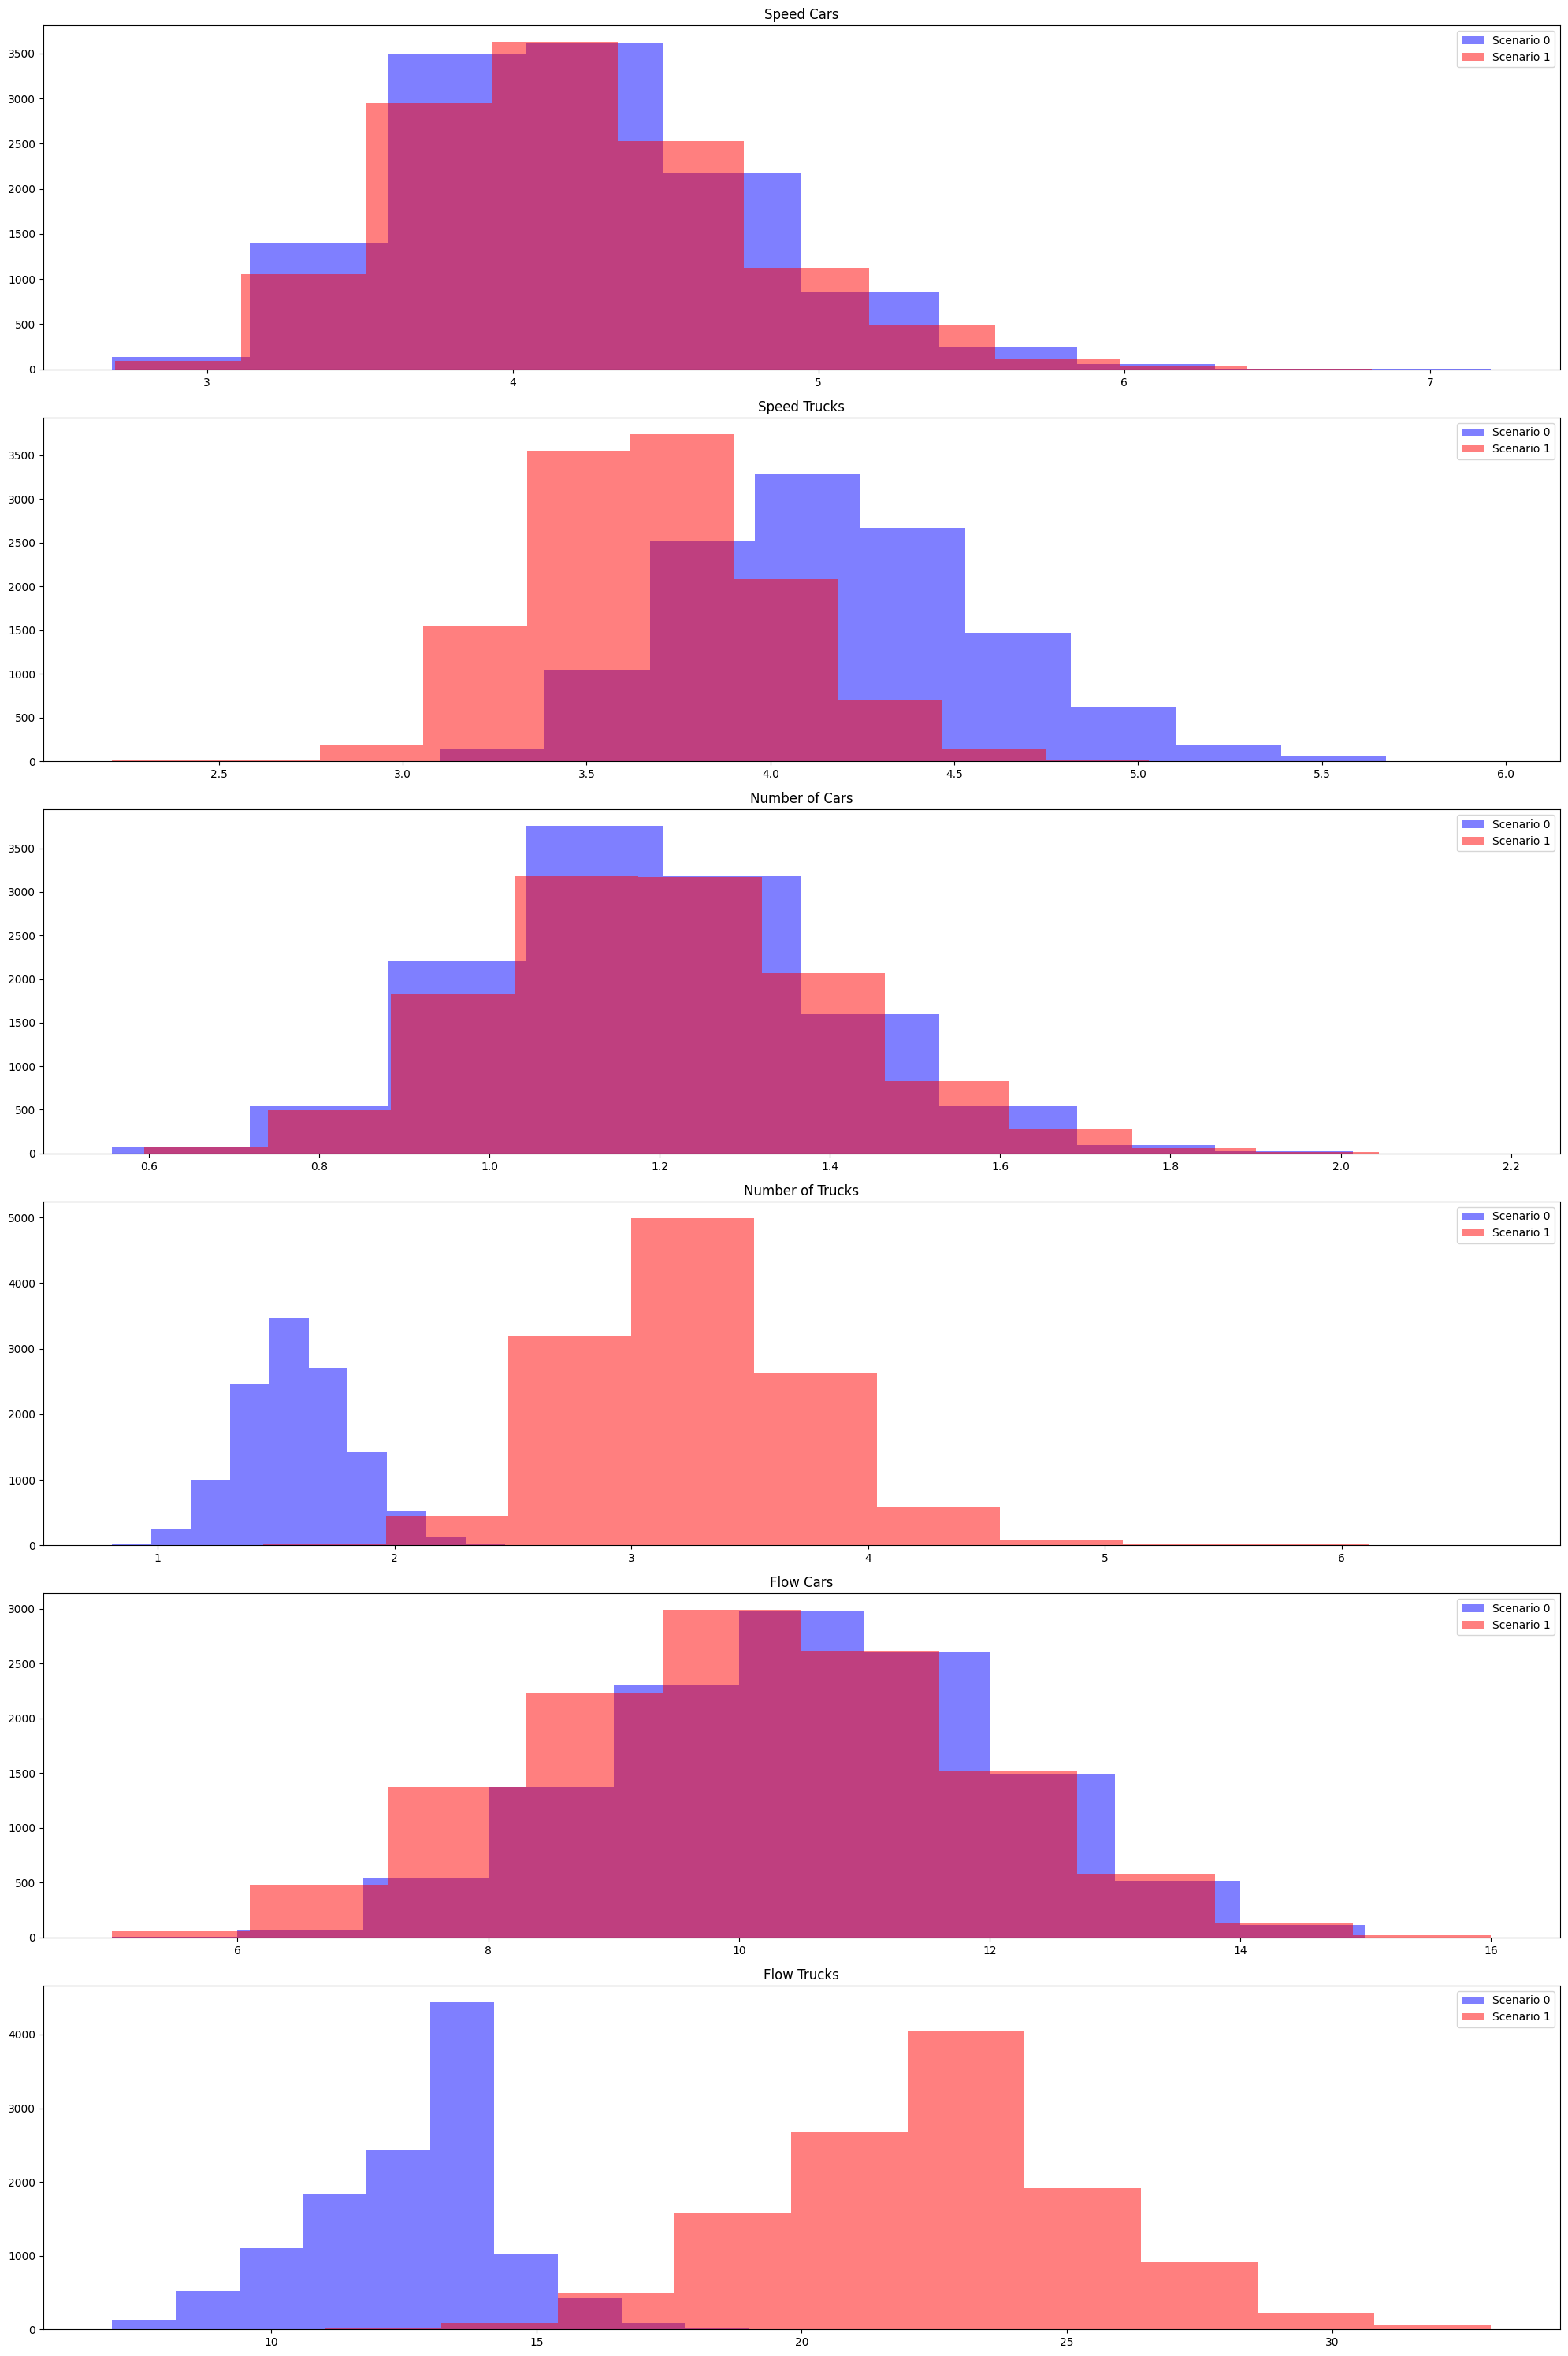

In [41]:
# prompt: create a function similar to plot_distribution but that simply plots the histograms, not using seaborn kde

import matplotlib.pyplot as plt
def plot_histograms(scenario_0, scenario_1):
  num_variables = len(febagni_scripts.variable_names)

  fig, axes = plt.subplots(num_variables, 1, figsize=(20, 5 * num_variables))

  for v in range(num_variables):
      data_s0_temp = scenario_0[v, :]
      data_s1_temp = scenario_1[v, :]

      axes[v].hist(data_s0_temp, alpha=0.5, label='Scenario 0', color='blue')
      axes[v].hist(data_s1_temp, alpha=0.5, label='Scenario 1', color='red')

      axes[v].set_title(f"{febagni_scripts.variable_names[v]}")
      axes[v].legend()

  plt.tight_layout()
  plt.show()

plot_histograms(scenario_0, scenario_1)


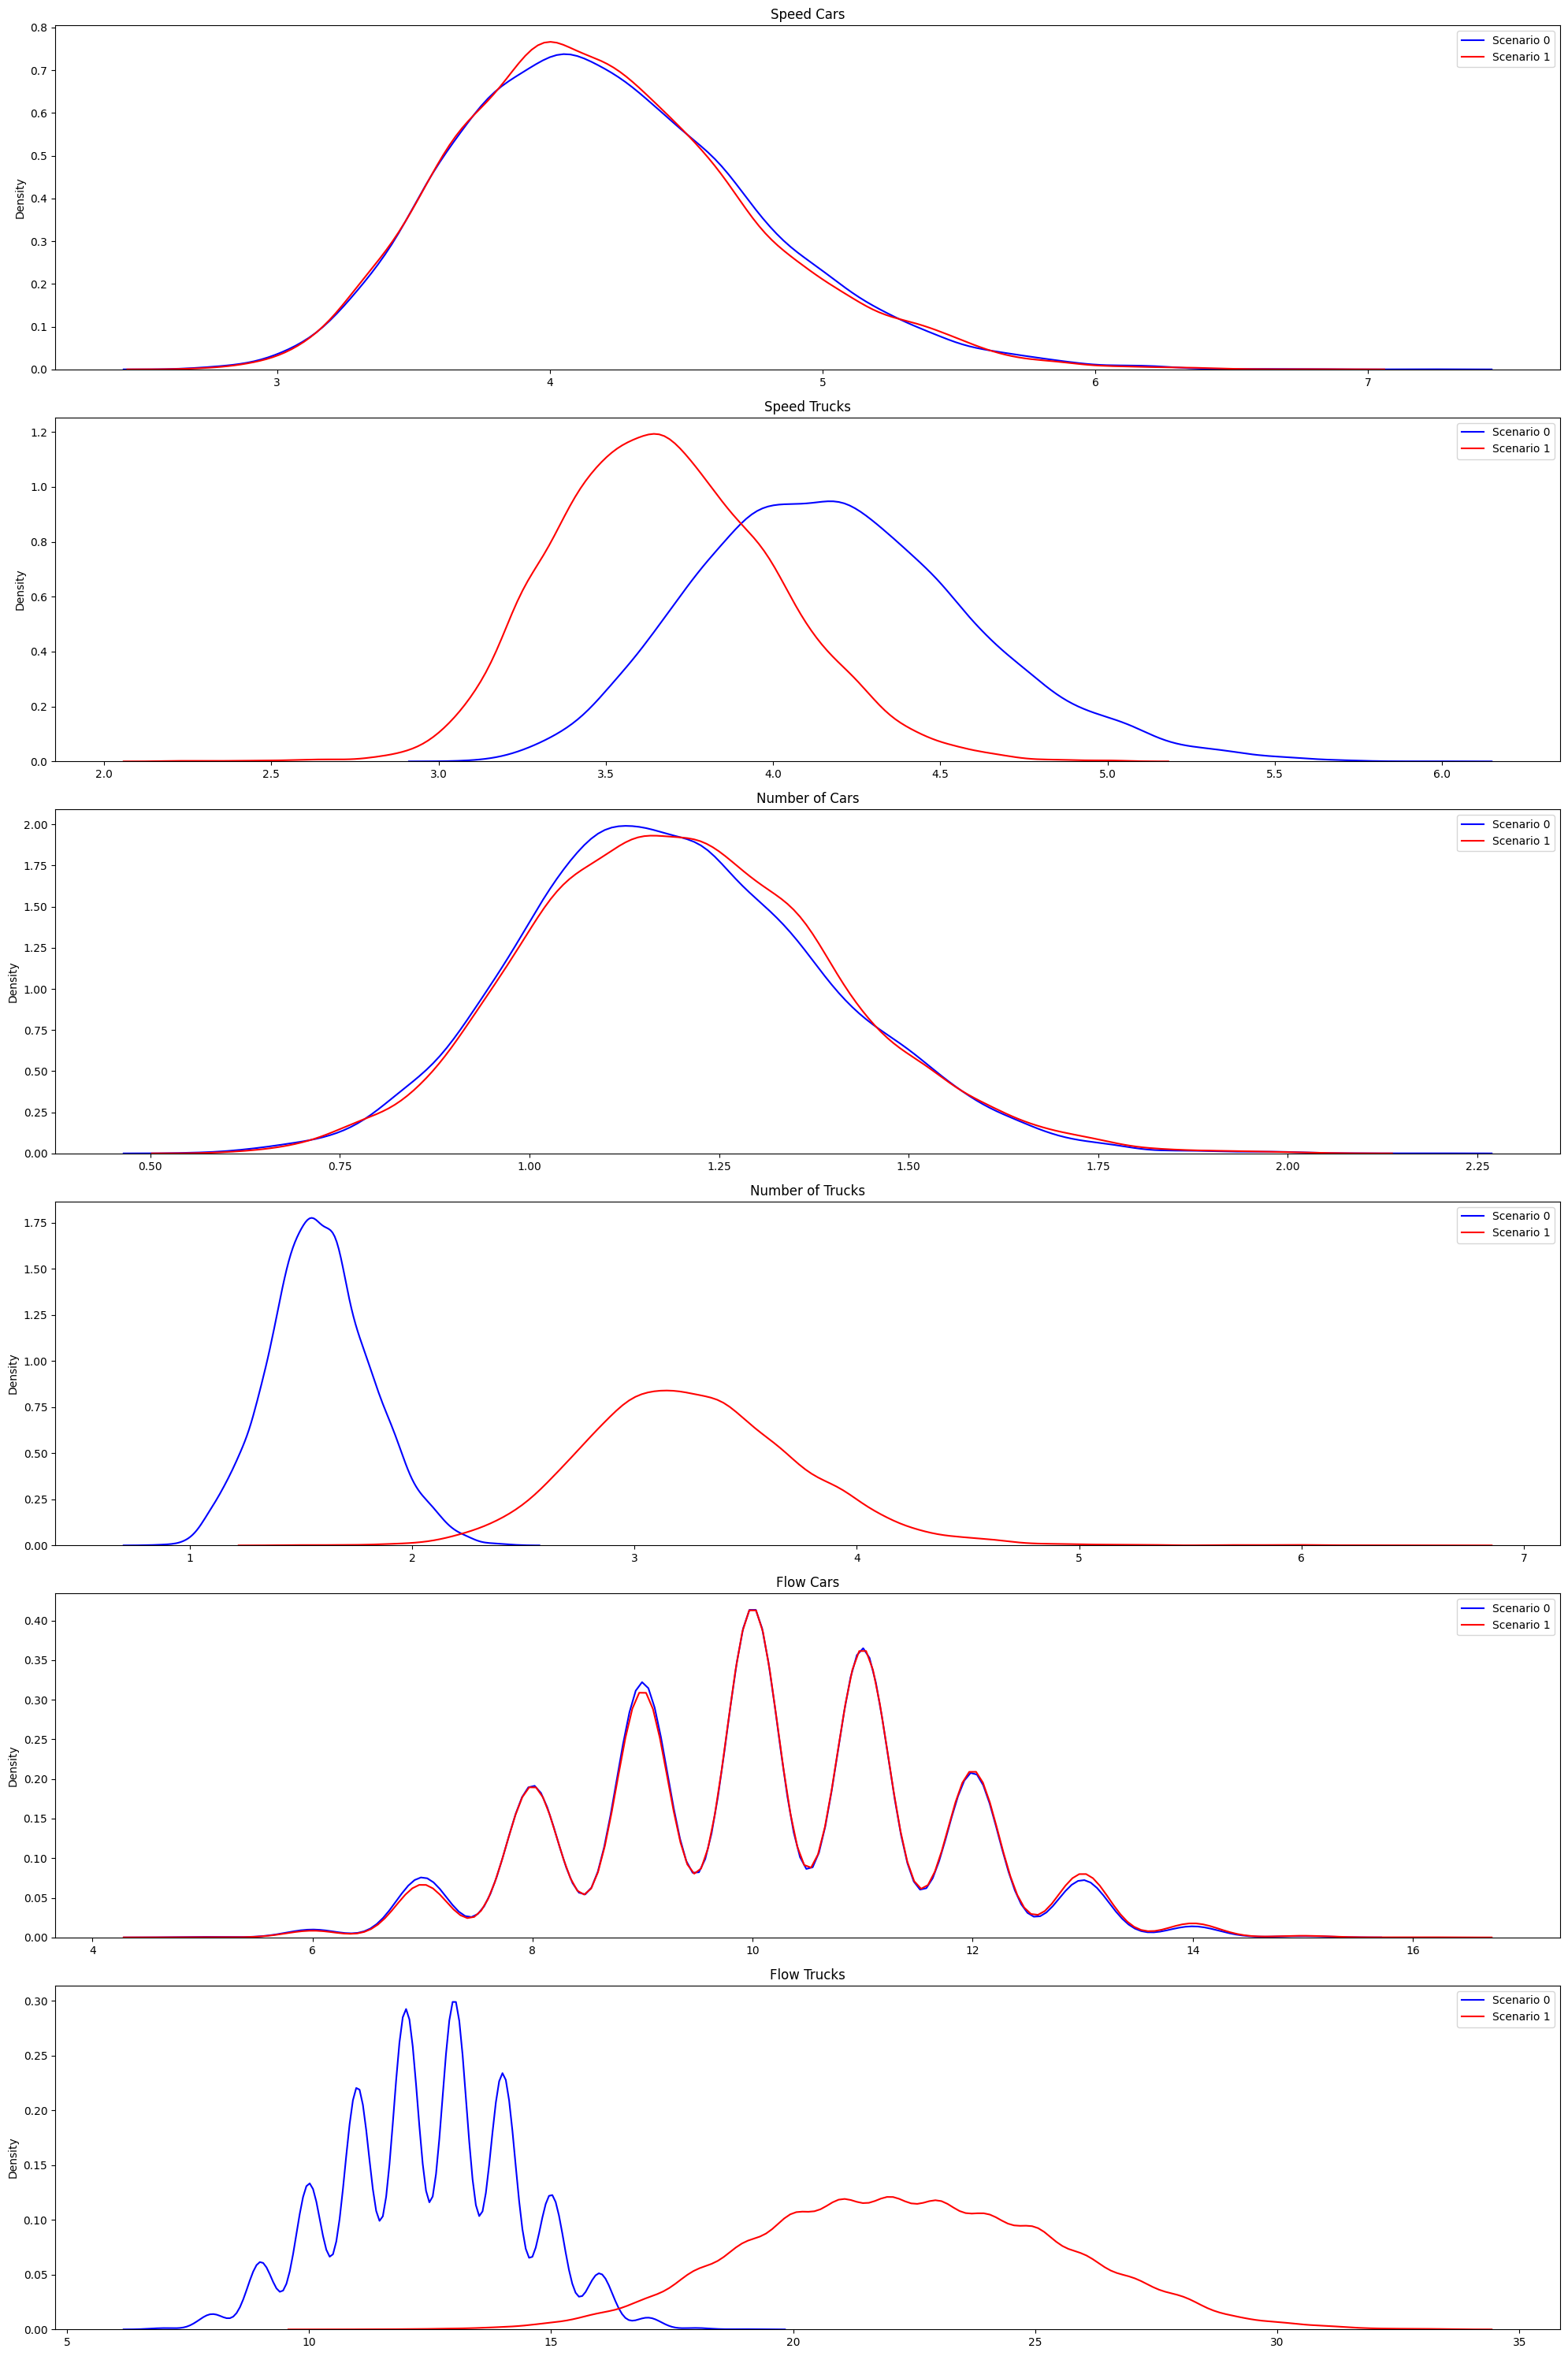

In [12]:
plot_distribution(scenario_0, scenario_1)

In [13]:
up_s0 = febagni_scripts.get_segment_data(scenario_0, "Elicoidale Upstream")
up_s1 = febagni_scripts.get_segment_data(scenario_1, "Elicoidale Upstream")

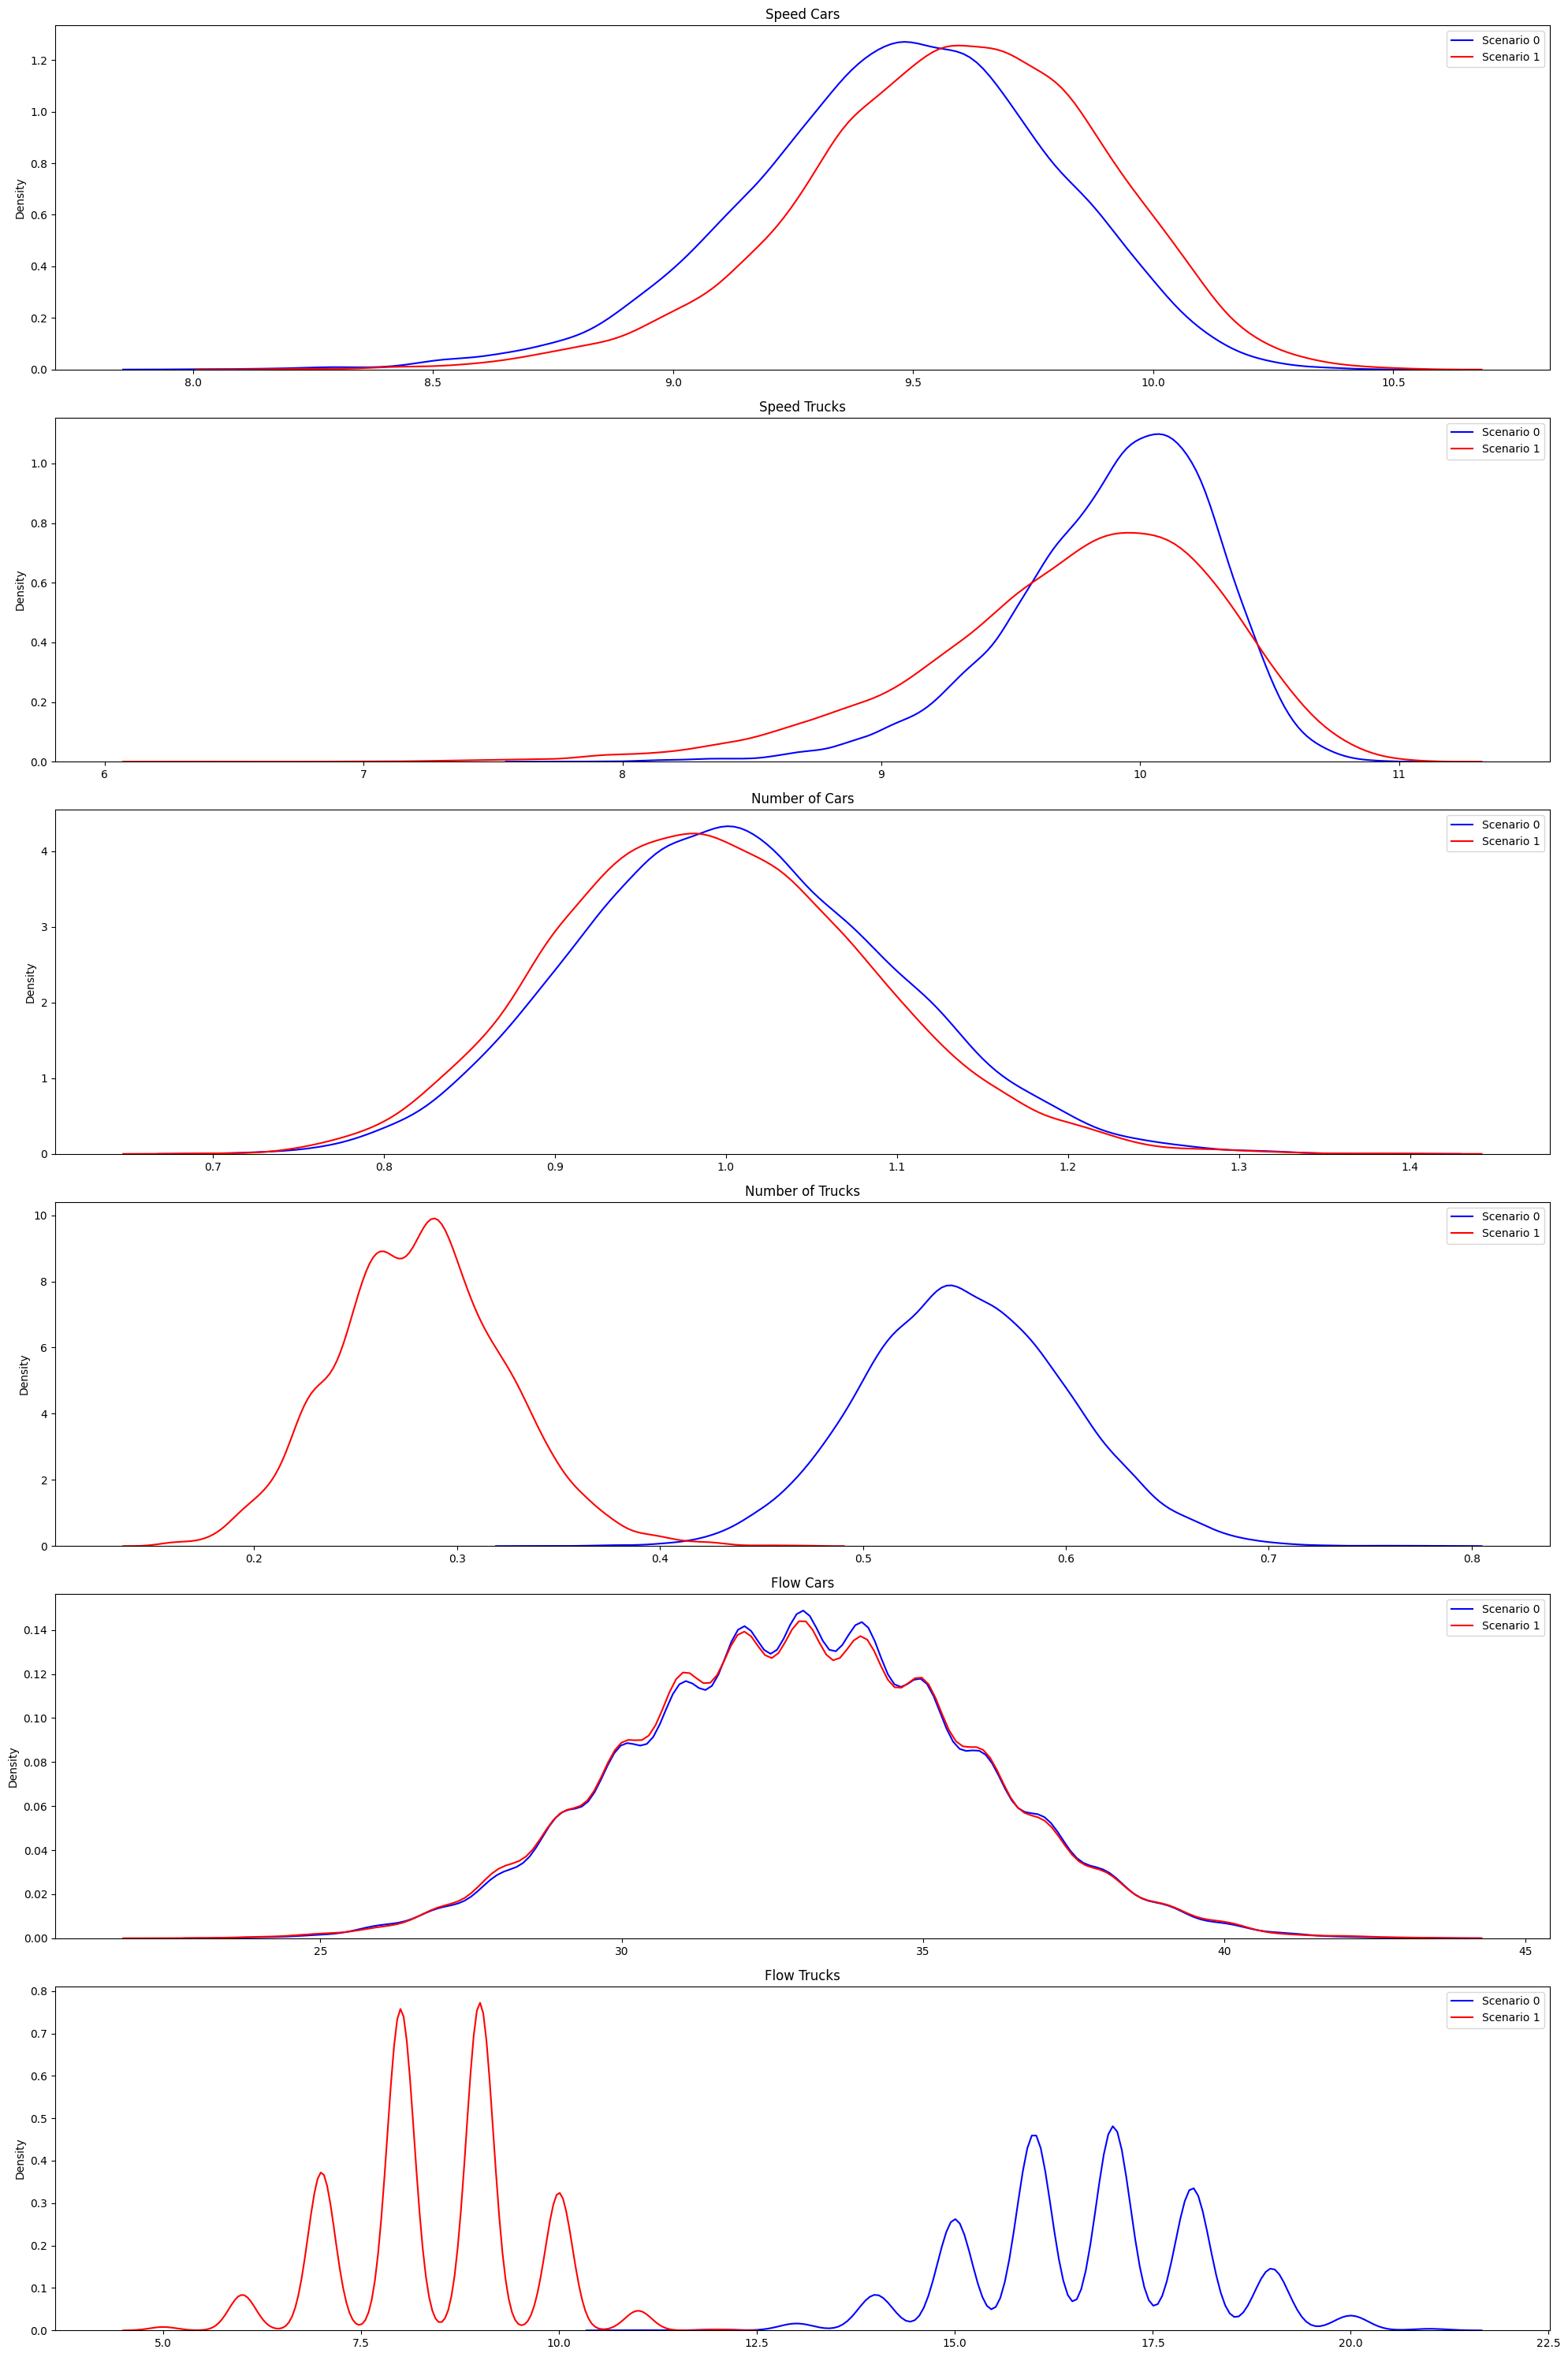

In [14]:
plot_distribution(up_s0, up_s1)

In [15]:
down_s0 = febagni_scripts.get_segment_data(scenario_0, "Elicoidale Downstream")
down_s1 = febagni_scripts.get_segment_data(scenario_1, "Elicoidale Downstream")

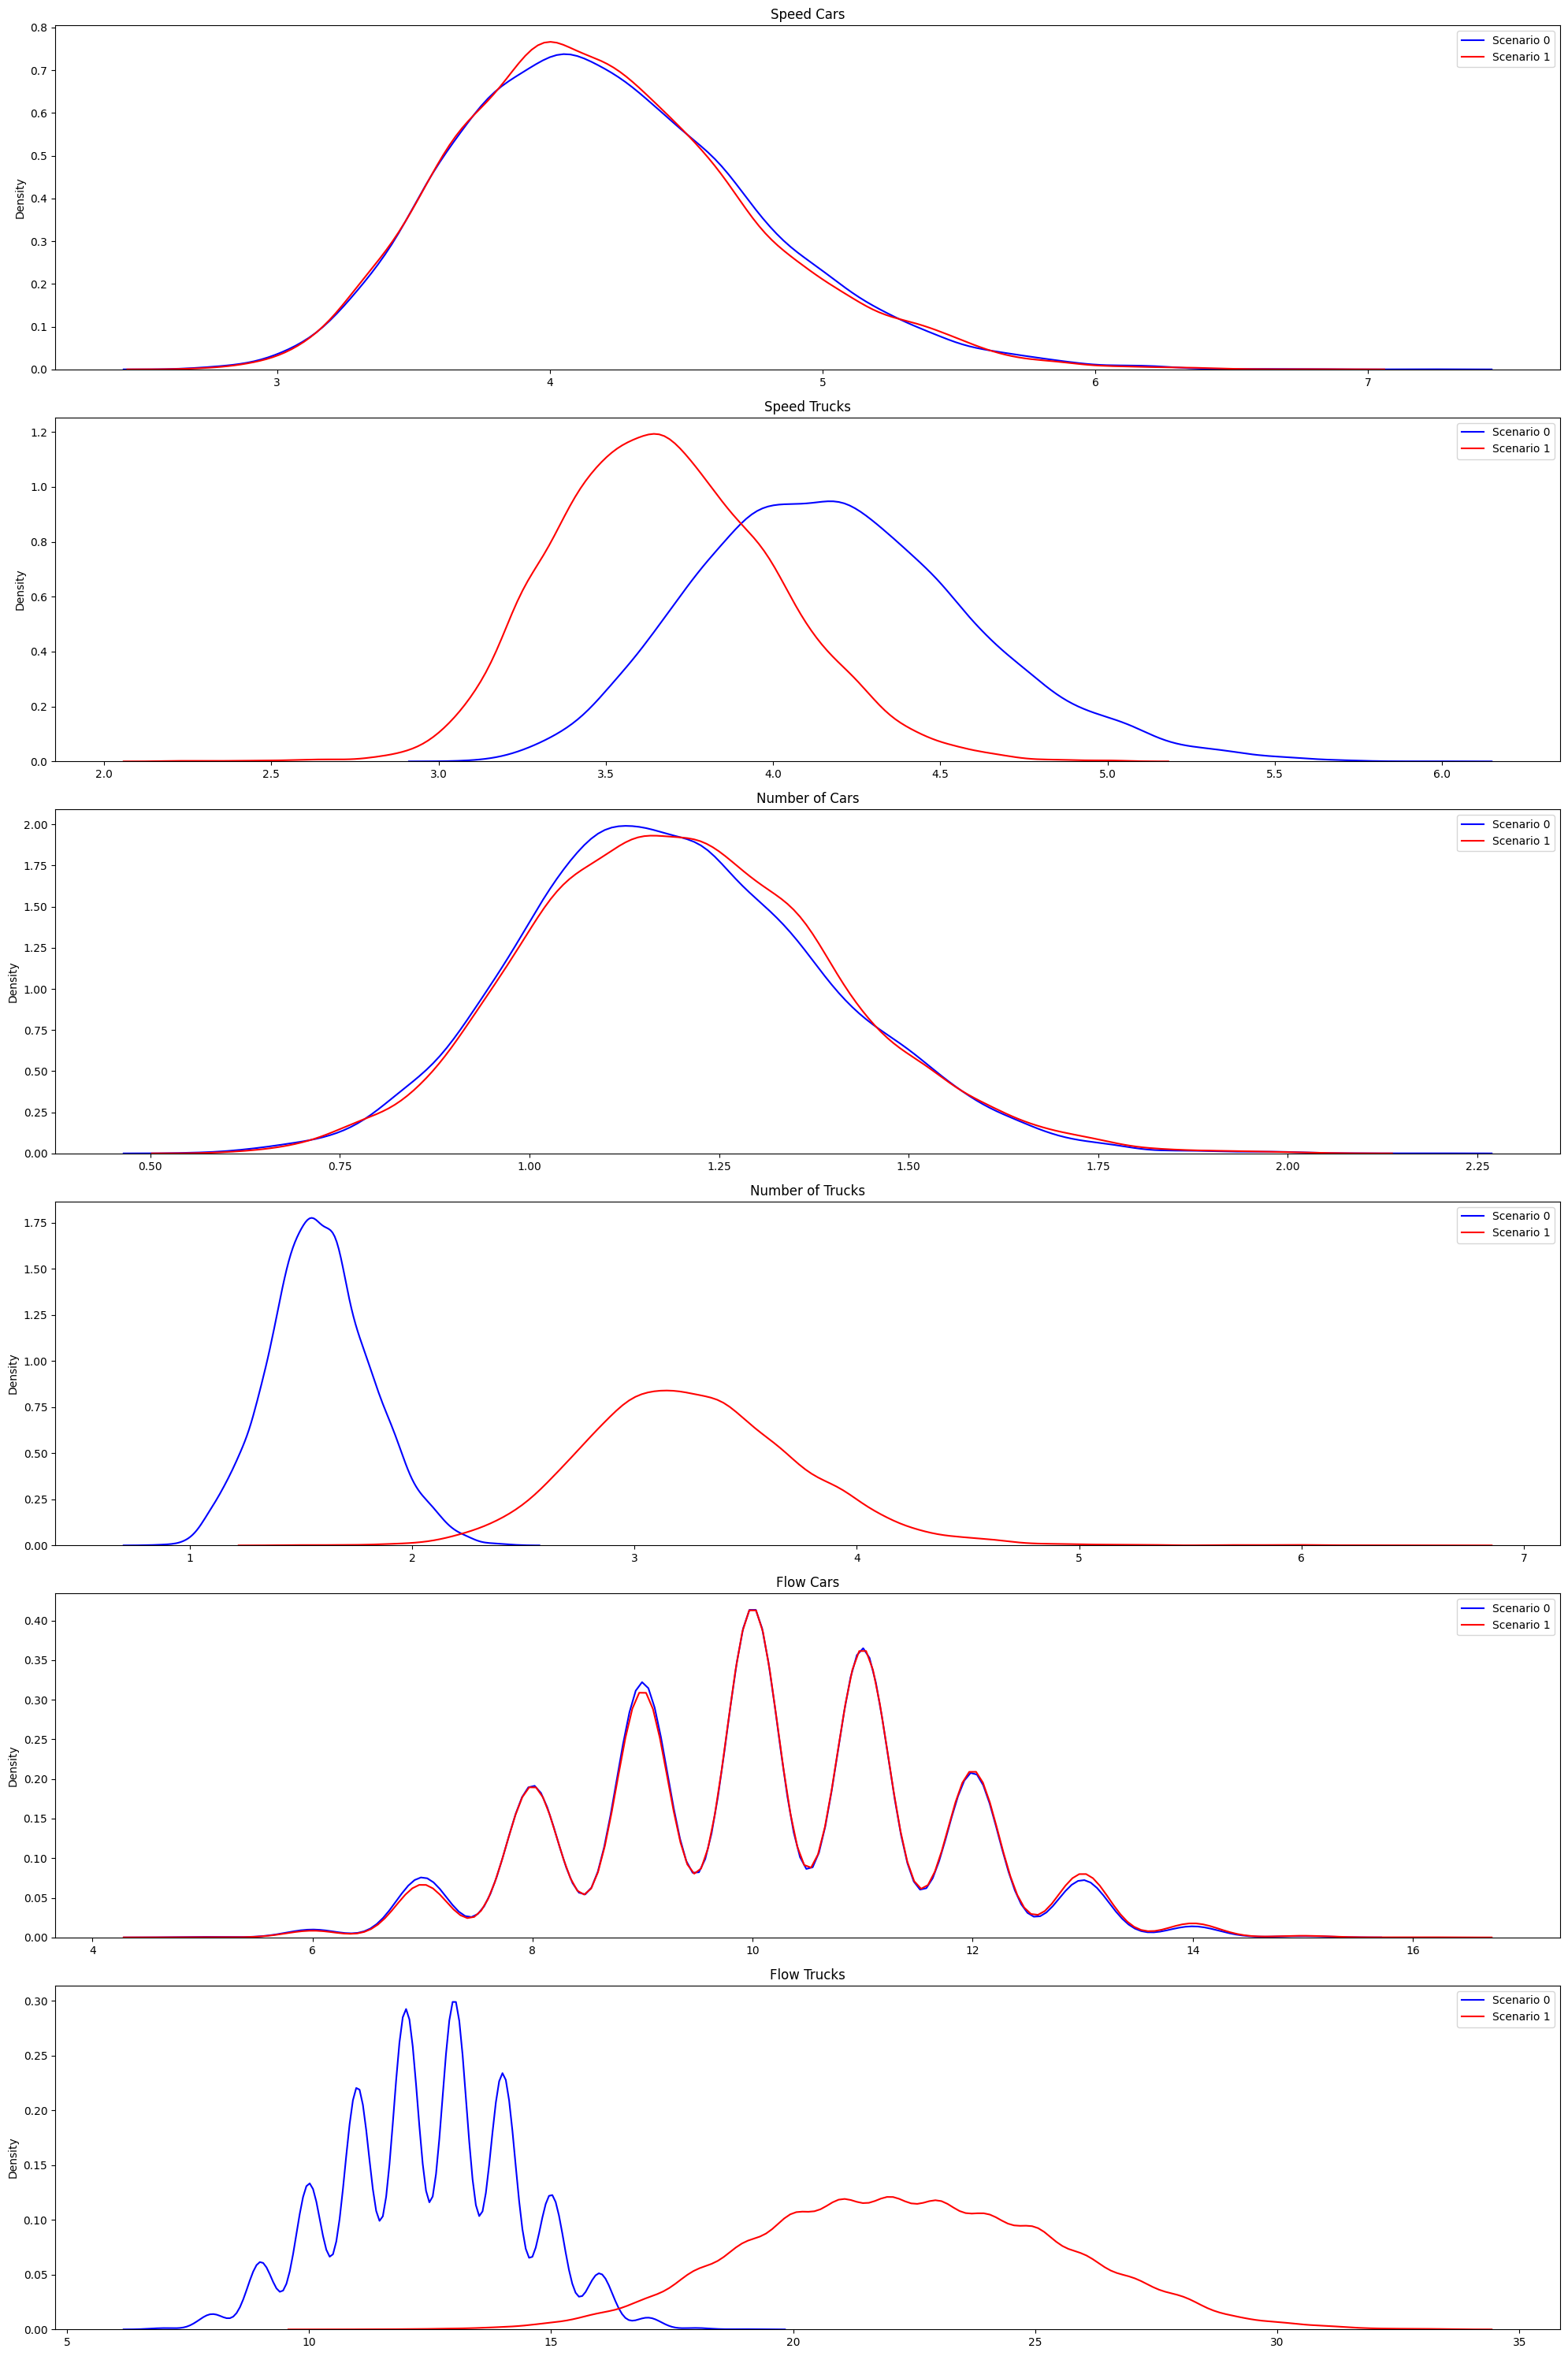

In [16]:
plot_distribution(down_s0, down_s1)

In [17]:
lungomare_s0 = febagni_scripts.get_segment_data(scenario_0, "Lungomare Canepa")
lungomare_s1 = febagni_scripts.get_segment_data(scenario_1, "Lungomare Canepa")

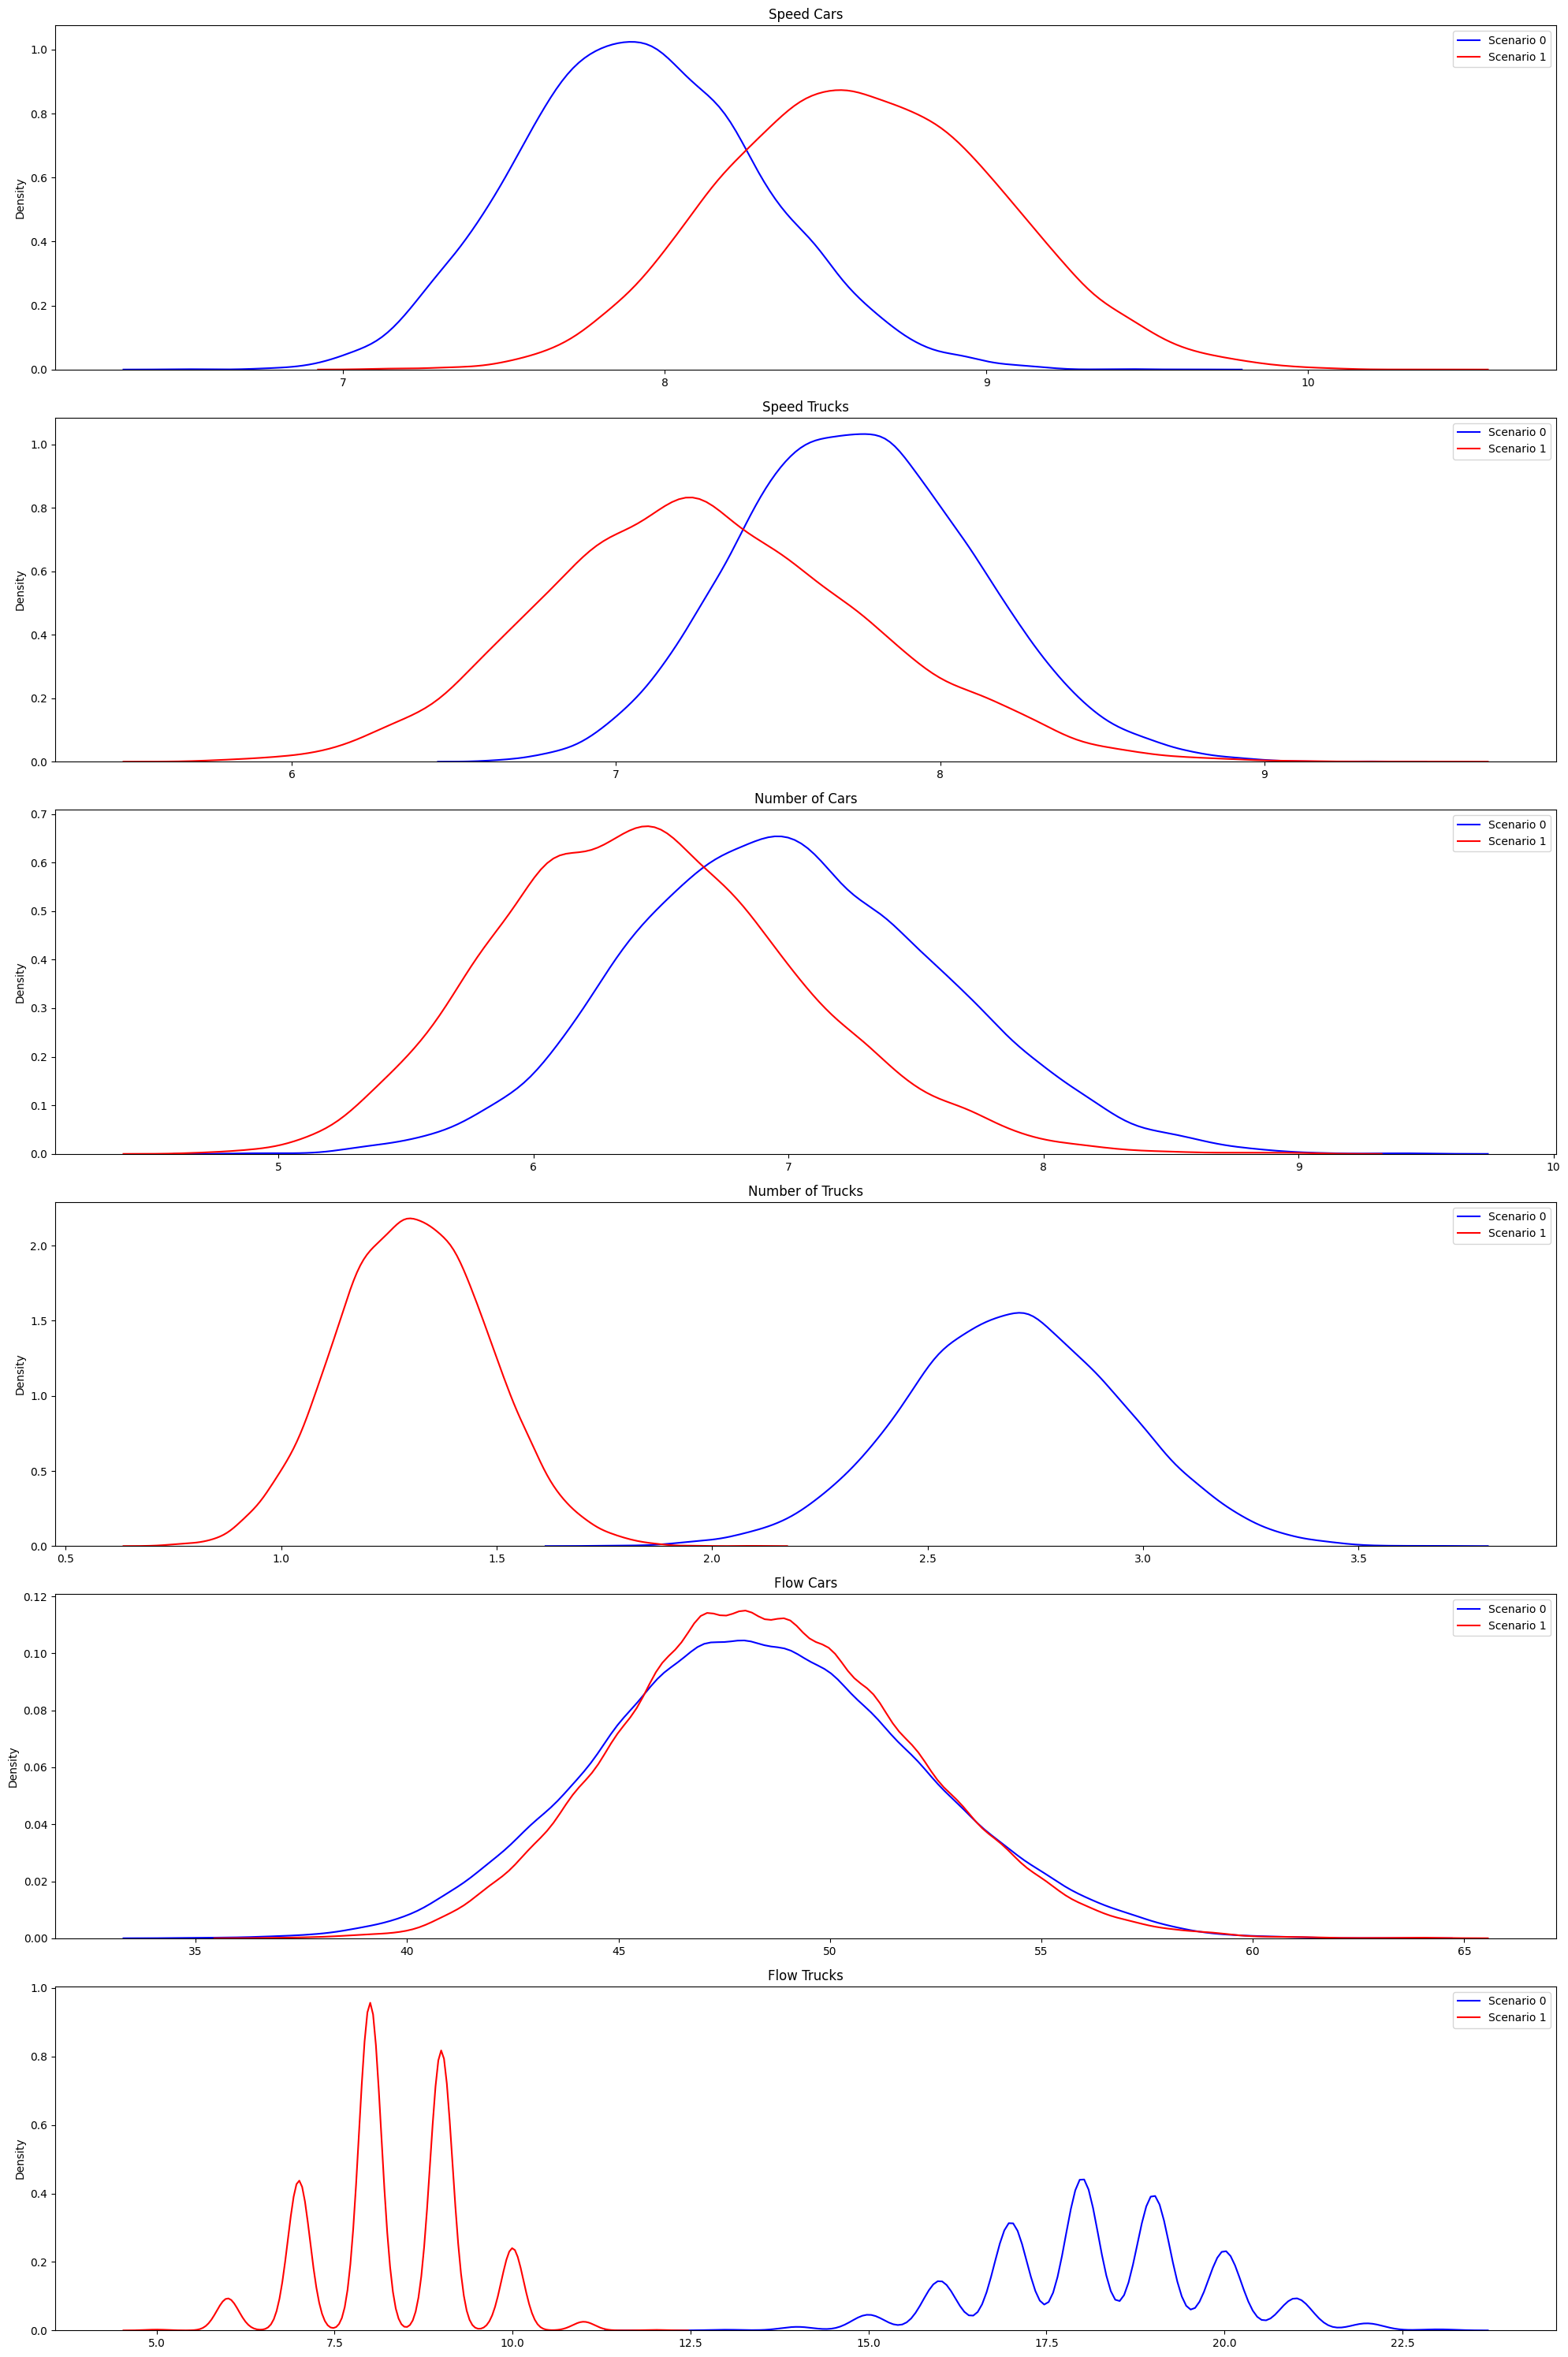

In [18]:
plot_distribution(lungomare_s0, lungomare_s1)

In [19]:
francia_s0 = febagni_scripts.get_segment_data(scenario_0, "Via di Francia")
francia_s1 = febagni_scripts.get_segment_data(scenario_1, "Via di Francia")

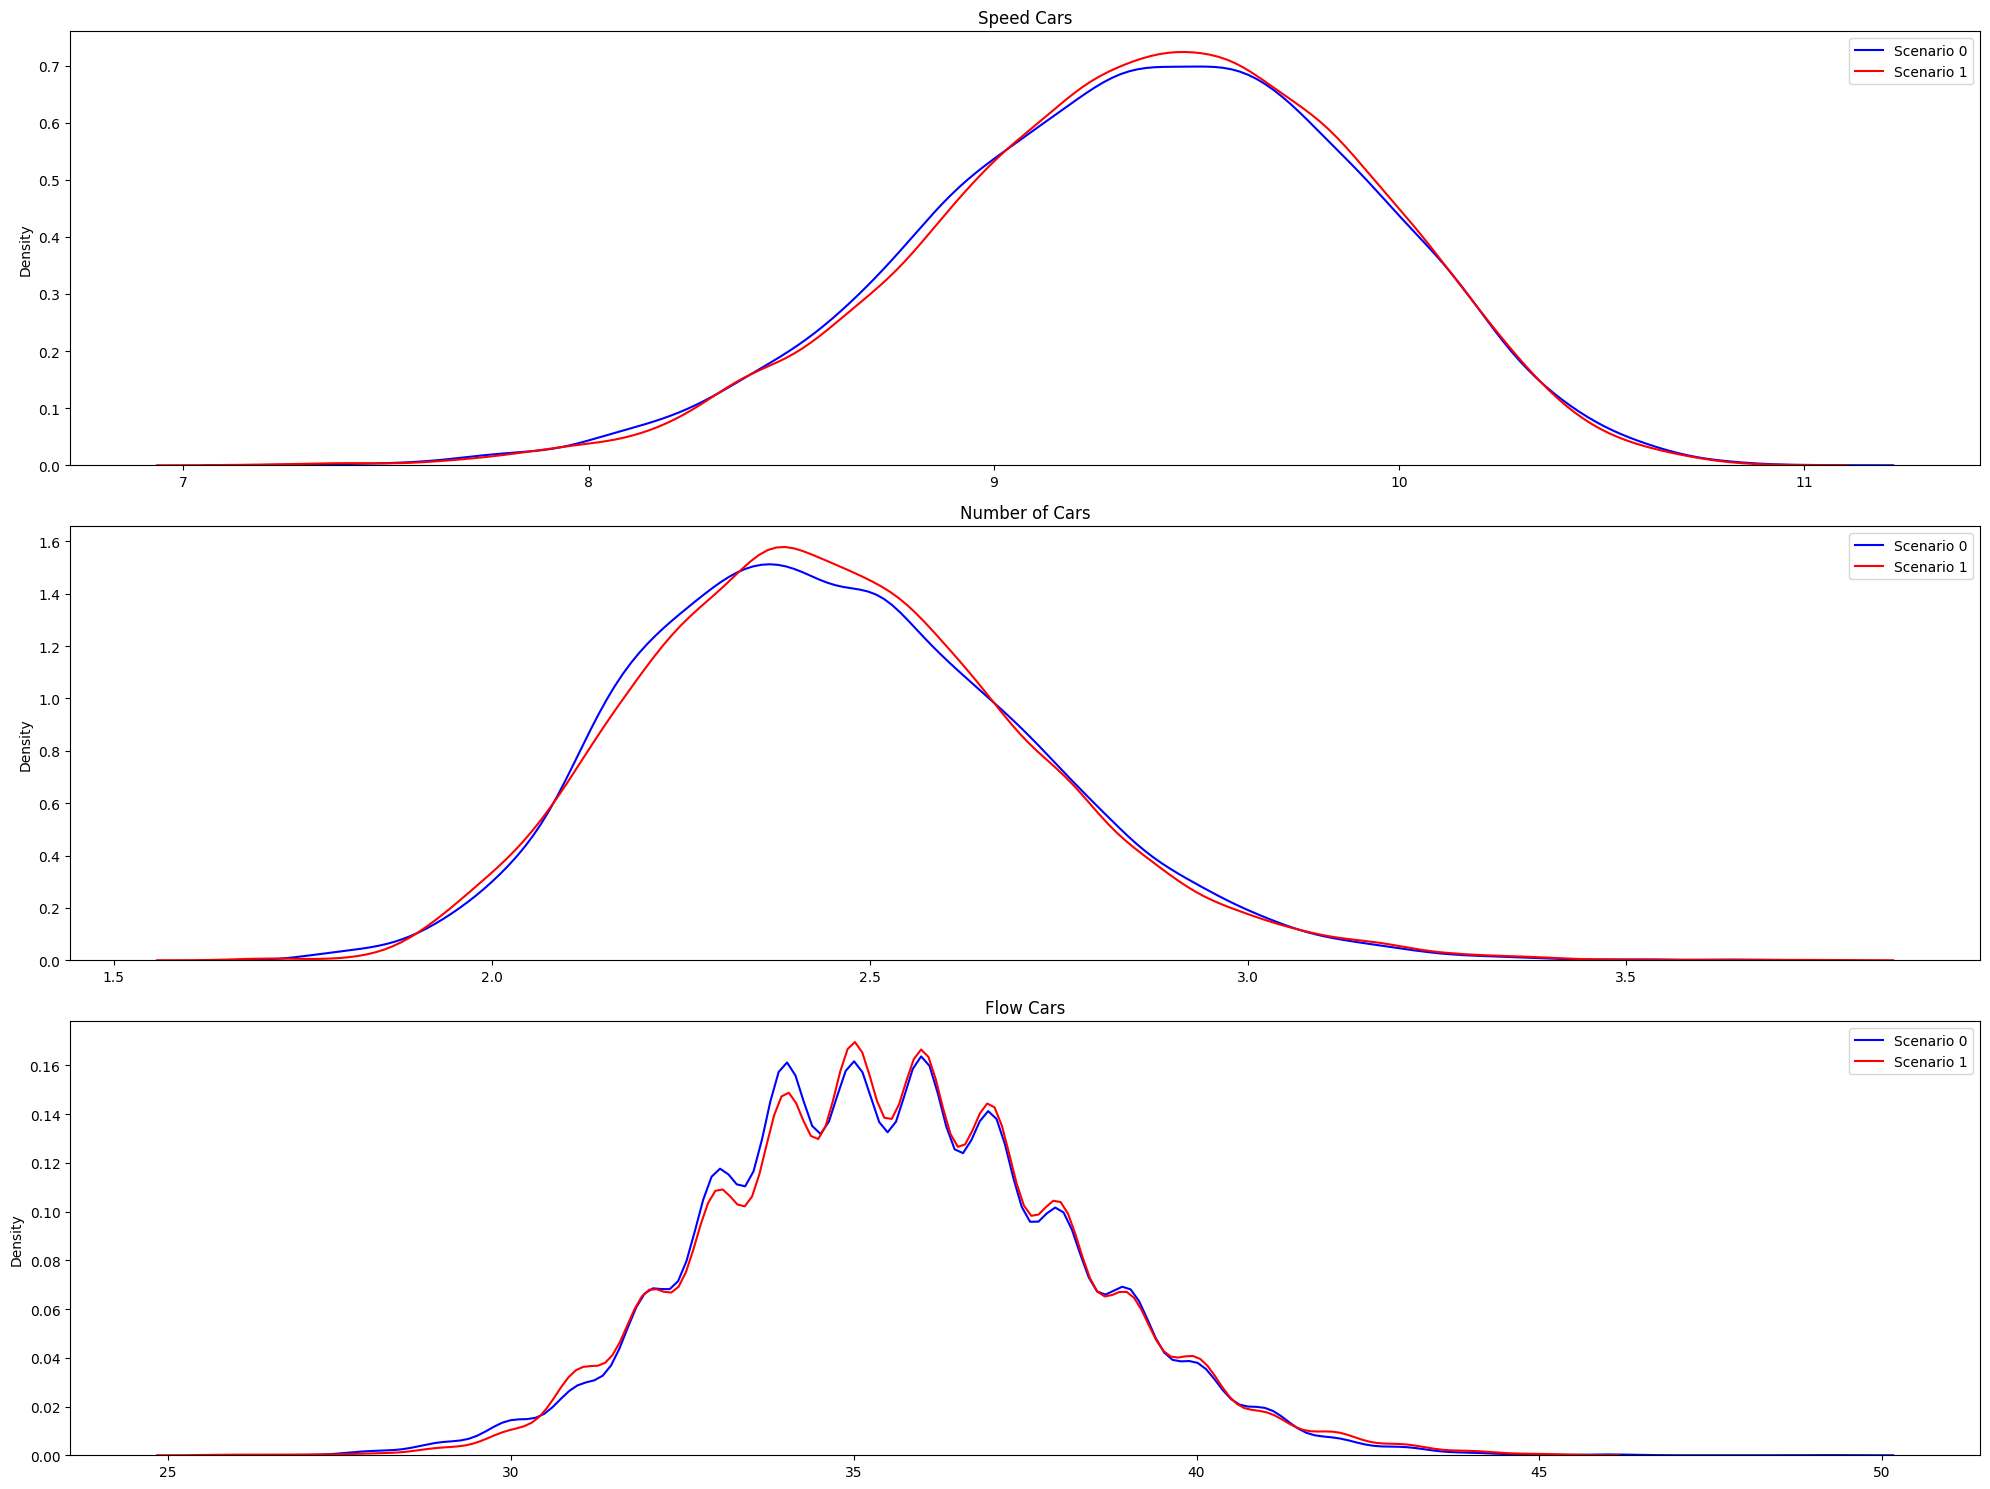

In [20]:
plot_distribution_francia(francia_s0, francia_s1)

In [21]:
def produce_sequences(s0, s1, T):
    """
    Shuffles the samples (columns) of s0 and s1, then produces 3 outputs: tr_data, sequence0, and sequence1.

    Args:
        s0: The first input sequence (NumPy array) of shape (m, n).
        s1: The second input sequence (NumPy array) of shape (m, n).
        T: The number of samples to include in tr_data.

    Returns:
        A tuple containing:
        - tr_data: The first T shuffled samples from s0 (shape (T, m)).
        - sequence0: The remaining samples from s0 (shape (n-T, m)).
        - sequence1: The fully shuffled s1 (shape (n, m)).
    """

    # Shuffle samples (columns) within s0 and s1
    shuffled_indices = np.random.permutation(s0.shape[1])  # Generate shuffled indices
    s0 = s0[:, shuffled_indices]  # Shuffle columns (samples) in s0
    s1 = s1[:, shuffled_indices]  # Shuffle columns (samples) in s1

    # Ensure T does not exceed available samples
    T = min(T, s0.shape[1])

    # Split s0 into tr_data (first T samples) and sequence0 (remaining samples)
    tr_data = s0[:, :T].T  # Shape (T, m)
    sequence0 = s0[:, T:].T  # Shape (n-T, m)

    # sequence1 is just the shuffled s1, transposed to (n, m)
    sequence1 = s1.T  # Shape (n, m)

    return tr_data, sequence0, sequence1


In [22]:
# TODO we need to make sure that:
# - tr_data: N samples from phi_0
# - sequence0: 1000-N samples from phi_0 (they must be distinct from tr_data)
# - sequence1: 1000 (or 1000-N?) samples from phi_1

def run_experiments_qtewma(scenario_0, scenario_1, N, ARL_0):
  methods = ["QT-EWMA"]
  # --- Demo parameters
  n_exp = 1000                     # number of iterations of the detection experiment

  # QT-EWMA params
  K = 32                          # number of bins of the QuantTree histogram
  lam = 0.03                      # lambda parameter of QT-EWMA

  # regarding our data
  cp = 0                       # change point

  detection_times = {method: np.zeros(n_exp) for method in methods}  # to compute the ARL_0
  stopping_times = {method: np.zeros(n_exp) for method in methods}  # to compute the detection delay

  for j in range(n_exp):
    # TODO
    # reshuffling data (both training and sequences)
    tr_data, sequence0, sequence1 = produce_sequences(scenario_0, scenario_1, N)

    # --- Training and monitoring
    # QT-EWMA
    qtewma = QT_EWMA(pi_values=K, transformation_type='none', ARL_0=ARL_0, lam=lam)
    # Training
    qtewma.train_model(tr_data)
    # Monitoring
    # TODO make sure that the sequences do not contain training set
    stopping_times['QT-EWMA'][j] = qtewma.monitor(sequence0)
    detection_times['QT-EWMA'][j] = qtewma.monitor(sequence1)


  #return stopping_times['QT-EWMA'], detection_times['QT-EWMA']

  #print(f" --- Results averaged over {n_exp} experiments ---")
  #print(f"{'method':15.15s} {'delay':8.8s} {'FA rate':8.8s} {'(target)':8.8s} {'ARL_0':8.8s} {'(target)':8.8s}")
  for method in methods:
      tp = np.where(detection_times[method] >= cp)
      avg_detection_delay = np.mean(detection_times[method][tp] - cp)

      # TODO filter out -1
      #empirical_ARL = np.mean(stopping_times[method])
      empirical_ARL = np.mean(stopping_times[method][stopping_times[method] != -1])
      #print(f"{method:15.15s} {avg_detection_delay:8.2f} {fa_rate:8.2f} {target_fa:8.2f} {empirical_ARL:8.2f} {ARL_0:8.2f}")
      #return n, avg_detection_delay, fa_rate, target_fa, empirical_ARL, ARL_0

      data = [{'N': N, 'avg_detection_delay': avg_detection_delay, 'empirical_ARL': empirical_ARL, 'ARL_0': ARL_0}]
      return pd.DataFrame(data) # Pass the list of dictionaries to pd.DataFrame
      #return pd.DataFrame([n, avg_detection_delay, fa_rate, target_fa, empirical_ARL, ARL_0], columns=['N', 'avg_detection_delay', 'fa_rate', 'target_fa', 'empirical_ARL', 'ARL_0'])

In [35]:
N=[64,128,256]
ARL_0=[500, 1000, 2000]

In [32]:
flow_variables_indices = [4, 5, 10, 11, 16, 17, 20]

mask = np.ones(scenario_0.shape[0], dtype=bool)
mask[flow_variables_indices] = False

In [36]:
results_df = pd.DataFrame(columns=['N', 'avg_detection_delay', 'empirical_ARL', 'ARL_0'])
for n in N:
  for arl in ARL_0:
    results = run_experiments_qtewma(scenario_0[mask], scenario_1[mask], n, arl)

    if results_df is None or results_df.empty:
        results_df = results.copy()
    else:
        results_df = pd.concat([results_df, results], ignore_index=True)

print("All segments, d=14")
print()
results_df

All segments, d=14



,N,avg_detection_delay,empirical_ARL,ARL_0
0,64,6.603,489.256000,500
1,64,7.190,1003.670000,1000
2,64,8.382,1994.422267,2000
3,128,6.195,493.043000,500
4,128,6.572,1027.116000,1000
5,128,7.157,1910.238716,2000
6,256,6.038,494.170000,500
7,256,6.266,981.194000,1000
8,256,6.666,2012.531062,2000


In [37]:
results_df = pd.DataFrame(columns=['N', 'avg_detection_delay', 'empirical_ARL', 'ARL_0'])
for n in N:
  for arl in ARL_0:
    # Get the results from the function
    results = run_experiments_qtewma(up_s0[:4], up_s1[:4], n, arl)
    # Create a temporary DataFrame for the result
    # Concatenate the temporary DataFrame with the main results DataFrame
    #print(results_df)
    if results_df is None or results_df.empty:
        results_df = results.copy()  # Avoid unnecessary concat
    else:
        results_df = pd.concat([results_df, results], ignore_index=True)

print("Elicoidale Upstream, d=4")
print()
results_df

Elicoidale Upstream, d=4



,N,avg_detection_delay,empirical_ARL,ARL_0
0,64,7.472,488.702000,500
1,64,10.394,1001.120000,1000
2,64,10.115,1846.560804,2000
3,128,7.468,517.283000,500
4,128,7.625,993.830000,1000
5,128,8.948,1959.762048,2000
6,256,6.479,499.913000,500
7,256,6.943,972.383000,1000
8,256,8.360,1954.368737,2000


In [38]:
results_df = pd.DataFrame(columns=['N', 'avg_detection_delay', 'empirical_ARL', 'ARL_0'])
for n in N:
  for arl in ARL_0:
    # Get the results from the function
    results = run_experiments_qtewma(down_s0[:4], down_s1[:4], n, arl)
    # Create a temporary DataFrame for the result
    # Concatenate the temporary DataFrame with the main results DataFrame
    #print(results_df)
    if results_df is None or results_df.empty:
        results_df = results.copy()  # Avoid unnecessary concat
    else:
        results_df = pd.concat([results_df, results], ignore_index=True)

print("Elicoidale Downstream, d=4")
print()
results_df

Elicoidale Downstream, d=4



,N,avg_detection_delay,empirical_ARL,ARL_0
0,64,6.327,490.649000,500
1,64,6.613,1012.962000,1000
2,64,7.312,1939.575301,2000
3,128,5.921,509.189000,500
4,128,6.228,945.993000,1000
5,128,6.320,2047.410410,2000
6,256,5.855,483.641000,500
7,256,6.139,960.376000,1000
8,256,6.335,1936.347390,2000


In [39]:
results_df = pd.DataFrame(columns=['N', 'avg_detection_delay', 'empirical_ARL', 'ARL_0'])
for n in N:
  for arl in ARL_0:
    results = run_experiments_qtewma(lungomare_s0[:4], lungomare_s1[:4], n, arl)
    # Create a temporary DataFrame for the result
    # Concatenate the temporary DataFrame with the main results DataFrame
    #print(results_df)
    if results_df is None or results_df.empty:
        results_df = results.copy()  # Avoid unnecessary concat
    else:
        results_df = pd.concat([results_df, results], ignore_index=True)

print("Lungomare Canepa, d=4")
print()
results_df

Lungomare Canepa, d=4



,N,avg_detection_delay,empirical_ARL,ARL_0
0,64,6.240,500.501000,500
1,64,6.568,927.214000,1000
2,64,6.976,1842.391348,2000
3,128,5.716,504.857000,500
4,128,6.219,978.476000,1000
5,128,6.437,1849.104733,2000
6,256,5.562,484.863000,500
7,256,5.935,958.623000,1000
8,256,6.212,1911.921529,2000


In [40]:
results_df = pd.DataFrame(columns=['N', 'avg_detection_delay', 'empirical_ARL', 'ARL_0'])
for n in N:
  for arl in ARL_0:
    # Get the results from the function
    results = run_experiments_qtewma(francia_s0[:2], francia_s1[:2], n, arl)
    # Create a temporary DataFrame for the result
    # Concatenate the temporary DataFrame with the main results DataFrame
    #print(results_df)
    if results_df is None or results_df.empty:
        results_df = results.copy()  # Avoid unnecessary concat
    else:
        results_df = pd.concat([results_df, results], ignore_index=True)

print("Via di Francia, d=2")
print()
results_df

Via di Francia, d=2



,N,avg_detection_delay,empirical_ARL,ARL_0
0,64,488.606000,493.749000,500
1,64,1009.990000,954.833000,1000
2,64,1903.742485,1834.749750,2000
3,128,492.365000,491.975000,500
4,128,1001.106000,945.175000,1000
5,128,1801.019076,1835.144578,2000
6,256,491.241000,495.567000,500
7,256,965.658000,941.094000,1000
8,256,1958.245245,1830.394790,2000
